# 주제선정 및 목적

서울시의 경우, 도심지역이기에 유동인구가 많고 유동 인구 편차가 높다는 문제가 있어 주차장이라는 공간을 물리적으로 공급하는 것에는 한계가 존재. 실시간 데이터로 접근 必

주차 수요는 다음과 같이 3가지 형태로 접근할 수 있다. 
1. 여가형 - 유동인구
2. 업무형 - (평일 출퇴근 유동인구), 교통량
3. 생활형 - 인구수, 교통량

현재 광진구의 교통/주차 분야에 있어 부족한 부분을 찾고자, 타 자치구와의 비교를 진행

필요한 데이터 목록 (기준 - 자치구)

--- From 공공데이터 포털 ----
- 자치구별 임대주택 현황 - 22년 2월 28일 기준
- 자치구별 인구 통계 - 23년 2월 말 기준
- 자치구별 연령대 인구 통계 - 2023년 기준
- 자치구별 공영주차장 자동차등록대수, 주차면수, 주차장 확보율 - 2022년 연말 기준
- 자치구별 노상, 노외, 부설 (주택가) 주차장 자동차 등록수 - 2022년 기준
- 자치구별 면적 - 22년 기준 (변동이 거의 없을 것으로 예상) 
- 자치구별 차량 세부 등록 현황 - 2023 2월 기준
- 자치구별 문화시설 개수 - 2021년 기준
- 자치구별 초중고교 개수 - KOSIS 2022 기준
- 자치구별 통행량 및 교통량 - ?

3/29 알게된 사실 (면수 기준)

민영 주차장 : 노외 (민영) + 건축물 부설 (일반주택, 공동주택, 일반건축물)

공영 주차장 : 노상(시영, 구영) + 노외 (시영, 구영)

# Data Loading

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore')
import os

In [2]:
data_dir = 'C:/Users/competition_data/gwangjin-gu-bigdata-competition/seoul'

In [5]:
# 자치구별 임대주택 현황
house = pd.read_csv(f'{data_dir}/자치구별 임대주택 현황.csv', encoding = 'cp949')
# 자치구별 인구 통계
person = pd.read_csv(f'{data_dir}/주민등록인구(월별)_20230320160814.csv', encoding = 'utf-8', header = 1, index_col = False) 
# 자치구별 연령대 인구 통계
age = pd.read_csv(f'{data_dir}/주민등록인구(연령별_동별)_20230323151927.csv', header = 2)
# 자치구별 공영주차장 차량등록수, 주차면수, 확보율
parking_lot = pd.read_csv(f'{data_dir}/주차장+확보율_20230320163735.csv', header = 1)
# 자치구별 주택가 주차장 확보율
parking_home = pd.read_csv(f'{data_dir}/주택가+주차장_20230320164929.csv', header = 1)
# 자치구별 면적, 구성비 행정동 수, 법정동 수
area = pd.read_csv(f'{data_dir}/행정구역_20230320174749.csv', header = 2)
# 자치구별 자동차등록 세부현황
car_register =  pd.read_csv(f'{data_dir}/자동차등록(월별_구별)_20230323133046.csv', header = 1)
# 자치구별 문화시설 현황
culture = pd.read_csv(f'{data_dir}/문화공간(지역문화복지시설)_20230323132206.csv', header = 1)
# 자치구별 초중고교 현황 (국.공립 사립, 고등학교의 경우 일반 + 특수목적 + 특성화 + 자율)
school = pd.read_csv(f'{data_dir}/서울시 초중고교 현황.csv', header = 1)

# 자치구별 주차장 현황 확인
parking = pd.read_csv(f'{data_dir}/주차장(동별)(2016년+이후)_20230329032403.csv', header = 1)

In [6]:
parking

,동별(1),동별(2),합계,합계.1,합계.2,합계.3,합계.4,합계.5,노상,노상.1,...,노외.6,노외.7,건축물부설,건축물부설.1,건축물부설.2,건축물부설.3,건축물부설.4,건축물부설.5,건축물부설.6,건축물부설.7
0,동별(1),동별(2),소계,소계,공영,공영,민영,민영,소계,소계,...,민영,민영,소계,소계,일반주택,일반주택,공동주택,공동주택,일반건축물,일반건축물
1,동별(1),동별(2),개소 (개소),면수 (면수),개소 (개소),면수 (면수),개소 (개소),면수 (면수),개소 (개소),면수 (면수),...,개소 (개소),면수 (면수),개소 (개소),면수 (면수),개소 (개소),면수 (면수),개소 (개소),면수 (면수),개소 (개소),면수 (면수)
2,합계,소계,309726,4501875,12304,177281,297422,4324594,11235,104496,...,788,28279,296634,4296315,115597,282426,87393,2361583,93644,1652306
3,합계,종로구,8232,92062,185,5833,8047,86229,147,1987,...,60,1206,7987,85023,2658,6748,1448,25103,3881,53172
4,합계,중구,4269,109153,170,5399,4099,103754,139,1236,...,42,1836,4057,101918,865,2293,735,28773,2457,70852
5,합계,용산구,7383,118632,386,6375,6997,112257,345,3403,...,30,624,6967,111633,2708,6264,2121,63687,2138,41682
6,합계,성동구,6711,134544,270,7056,6441,127488,236,4278,...,25,658,6416,126830,2948,6577,894,75816,2574,44437
7,합계,광진구,20444,134389,3063,4856,17381,129533,3014,3032,...,21,449,17360,129084,9248,21926,4365,63783,3747,43375
8,합계,동대문구,10080,148103,603,5862,9477,142241,569,3733,...,14,280,9463,141961,4074,9395,1750,81835,3639,50731
9,합계,중랑구,13251,132884,571,11179,12680,121705,519,6106,...,28,933,12652,120772,4164,10299,3927,80089,4561,30384


# Preprocessing

In [53]:
# 자치구별 임대주택 현황 Preprocessing
house.drop(25, axis = 0, inplace=True)
house.rename(columns = {'구별':'자치구명'},inplace=True)
house.fillna(0, inplace=True)
house['자치구명'] = house['자치구명'].str.strip()

# 자치구별 인구 현황 Preprocessing
person.rename(columns = {'동별(1)':'Total', '동별(2)':'자치구명', '세대 (세대)':'세대 수', '합계 (명)':'인구수', 
                         '합계 (명).1':'남자 인구수', '합계 (명).2':'여자 인구수', '한국인 (명)':'한국인 총 인구수', 
                         '한국인 (명).1':'한국인 남자 인구수', '한국인 (명).2':'한국인 여자 인구수', 
                         '외국인 (명)':'외국인 총 인구수', '외국인 (명).1':'외국인 남자 인구수', '외국인 (명).2':'외국인 여자 인구수'}, inplace=True)
person.drop(['Total'], axis = 1, inplace = True)
person.drop([0, 1], axis = 0, inplace = True)
person.reset_index(drop=True, inplace = True)
person['자치구명'] = person['자치구명'].str.strip()

# 자치구별 연령대별 인구 현황 Preprocessing
age.drop([0, 1, 2], axis = 0, inplace = True)
age_drop_idx = age[age['항목'].str.contains('계')].index
age.drop(age_drop_idx, inplace = True)
age.drop(['동별(1)', '소계'], axis = 1, inplace = True)
age.reset_index(drop=True, inplace = True)
age.rename(columns = {'동별(2)':'자치구명'},inplace = True)
age = age.groupby(['자치구명']).sum()
age.reset_index(drop = False, inplace = True)

# 자치구별 공영주차장 기준 차량등록수, 주차면수, 주차장 확보율 preprocessing
parking_lot.drop([0], axis = 0, inplace=True)
parking_lot.drop(['자치구별(1)', '자동차등록대수 (대)'], axis=1, inplace=True)
parking_lot.reset_index(drop=True, inplace=True)
parking_lot.rename(columns = {'자치구별(2)':'자치구명'}, inplace=True)
parking_lot['자치구명'] = parking_lot['자치구명'].str.strip()

# 자치구별 주택가주차장(노상, 노외, 부설 주차장 기준) 승용차등록수, 주차면수, 주차장 확보율 Preprocessing
parking_home.rename(columns = {'자치구별(2)':'자치구명', '자가용승용차 (대)':'자가용승용차대수 (대)', '주택가주차장 (면수).1':'노상주차장 면수',
                              '주택가주차장 (면수).2':'노외주차장 면수', '주택가주차장 (면수).3':'부설주차장 면수'}, inplace=True)
parking_home.drop([0, 1], axis=0, inplace=True)
parking_home.drop(['자치구별(1)', '자가용승용차대수 (대)', ], axis=1, inplace=True)
parking_home.reset_index(drop=True, inplace=True)
parking_home['자치구명'] = parking_home['자치구명'].str.strip()

# 자치구별 면적, 구성비 행정동 수, 법정동 수 Preprocessing
area.drop(['자치구별(1)', '소계', '소계.1'], axis=1, inplace=True)
area.drop([0],axis=0, inplace=True)
area.rename(columns = {'자치구별(2)':'자치구명', '행정 (개)':'행정동 수', '법정 (개)':'법정동 수'}, inplace=True)

# 자치구별 차량 세부 등록현황 Preprocessing
car_register.drop([0], axis=0, inplace=True)
car_register.rename(columns = {'자치구별(2)' : '자치구명'}, inplace=True)

# 자치구별 문화시설 현황 Preprocessing
culture.drop([0], axis = 0, inplace = True)
culture.rename(columns = {'자치구별(2)' : '자치구명'}, inplace = True)
culture.drop(['자치구별(1)'], axis = 1, inplace=True)

# 자치구별 초중고교 현황 Preprocessing
school.drop([0], axis = 0, inplace = True)
school.rename(columns = {'자치구별(2)' : '자치구명'}, inplace = True)

In [54]:
# Data Merge (자치구 기준)
df = pd.merge(person, house, on=['자치구명'], how = 'inner')
df = pd.merge(df, age, on = ['자치구명'], how = 'inner')
df = pd.merge(df, parking_lot, on = ['자치구명'], how = 'inner')
df = pd.merge(df, parking_home, on = ['자치구명'], how = 'inner')
df = pd.merge(df, car_register, on = ['자치구명'], how = 'inner')
df = pd.merge(df, culture, on = ['자치구명'], how = 'inner')
df = pd.merge(df, school, on = ['자치구명'], how = 'inner')
df = pd.merge(area, df, on = ['자치구명'], how = 'inner')

In [55]:
# 완성한 데이터프레임 데이터 형 변환
df = df.astype({'세대 수':'int64', '인구수':'int64', '남자 인구수':'int64', '여자 인구수':'int64', '한국인 총 인구수':'int64', 
               '한국인 남자 인구수':'int64', '한국인 여자 인구수':'int64', '외국인 총 인구수':'int64', '외국인 남자 인구수':'int64',
               '외국인 여자 인구수':'int64', '영구임대':'int64', '공공임대':'int64', '국민임대':'int64', '장기전세':'int64',
               '주거환경':'int64', '외국인임대':'int64', '행복주택':'int64','재개발임대':'int64', '역세권청년':'int64', 
               '다가구':'int64', '도시형':'int64', '전세임대':'int64', '장기안심':'int64', '기타임대':'int64', 
               '주택가주차장 (면수)':'int64', '노상주차장 면수':'int64', '노외주차장 면수':'int64', '부설주차장 면수':'int64',
               '주택가주차장확보율 (%)':'float64'})

In [56]:
# 파생변수 추가
df['임대주택 수'] = df[['영구임대', '공공임대', '국민임대', '장기전세', '주거환경', '외국인임대', '행복주택', '재개발임대', 
                        '역세권청년', '다가구', '도시형', '전세임대', '장기안심','기타임대']].sum(axis = 1)
df['승용차 수'] = df['관용 - 승용차'] + df['자가용 - 승용차'] + df['영업용 - 승용차']
df['승합차 수'] = df['관용 - 승합차'] + df['자가용 - 승합차'] + df['영업용 - 승합차']
df['화물차 수'] = df['관용 - 화물차'] + df['자가용 - 화물차'] + df['영업용 - 화물차']
df['특수차 수'] = df['관용 - 특수차'] + df['자가용 - 특수차'] + df['영업용 - 특수차']
df['문화시설 수'] = df['문예회관'] + df['종합사회복지관'] + df['구민(다목적)체육시설'] + df['청소년수련시설']
df['학교 수'] = df['초등학교 수'] + df['중학교 수'] + df['고등학교 수']

# EDA 

In [57]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 출력 시 폰트 깨짐 방지
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# - 출력 시 폰트 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

In [58]:
# EDA를 위한 데이터프레임 생성
df_eda = df[['자치구명', '세대 수', '인구수', '임대주택 수', '승용차 수', '승합차 수', '화물차 수', '특수차 수',
             '문화시설 수', '학교 수', '주차면수 (면수)', '주차장확보율 (%)', '주택가주차장 (면수)', '노상주차장 면수',
             '노외주차장 면수', '부설주차장 면수', '주택가주차장확보율 (%)']]

In [62]:
df_eda

,자치구명,세대 수,인구수,임대주택 수,승용차 수,승합차 수,화물차 수,특수차 수,문화시설 수,학교 수,주차면수 (면수),주차장확보율 (%),주택가주차장 (면수),노상주차장 면수,노외주차장 면수,부설주차장 면수,주택가주차장확보율 (%)
0,종로구,72773,152167,1401,41574,3490,5634,273,5,36,92062,182.9,34690,1661,1178,31851,88.8
1,중구,63492,130862,4714,47730,2860,6811,421,15,31,109153,185.5,34056,861,2129,31066,75.8
2,용산구,109778,232804,2382,67042,2171,6183,157,8,34,118632,157.1,75458,3382,2125,69951,115.4
3,성동구,133517,287447,9960,89563,2989,10866,289,11,40,134544,128.8,89408,4247,2768,82393,108.0
4,광진구,169648,350820,2050,83897,2748,10922,383,9,43,134389,136.4,90546,3013,1824,85709,112.6
5,동대문구,170766,353869,8816,84199,3059,12228,273,6,47,148103,148.9,96756,3630,1896,91230,118.9
6,중랑구,187776,390018,9829,97119,3994,14778,526,8,48,132884,114.5,100785,6106,4291,90388,111.1
7,성북구,197673,441586,11818,107638,4256,10627,283,11,60,155254,126.6,109833,4545,1855,103433,104.4
8,강북구,144506,297265,6447,63109,3171,8607,247,9,34,96636,128.5,75922,3040,2230,70652,124.6
9,도봉구,138384,313137,3662,81735,3198,10372,334,11,46,110933,115.9,86339,2897,1762,81680,112.3


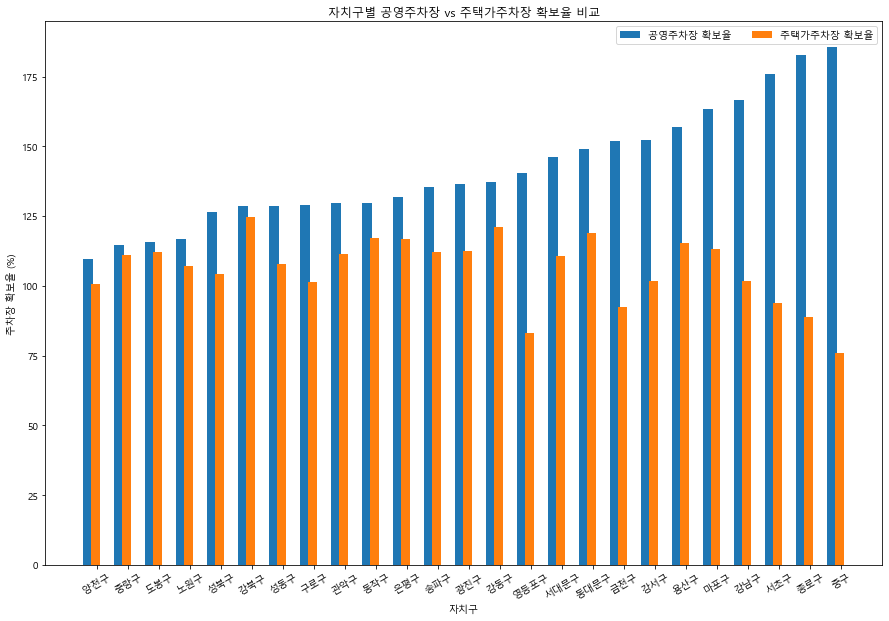

In [63]:
w = 0.3
nrow = df.shape[0]
idx = np.arange(nrow)

# 자치구별 공영주차장 확보율, 주택가(노상, 노외, 부설) 주차장 확보율 비교
df_parking = df_eda.sort_values(by = ['주차장확보율 (%)', '주택가주차장확보율 (%)'])
plt.figure(figsize = (15, 10))
plt.title('자치구별 공영주차장 vs 주택가주차장 확보율 비교')
plt.bar(idx - w, df_parking['주차장확보율 (%)'], width = w, label = '공영주차장 확보율')
plt.bar(idx - 0.2 * w, df_parking['주택가주차장확보율 (%)'], width = w, label = '주택가주차장 확보율')
plt.xticks(idx, df_parking['자치구명'], rotation = 30)
plt.xlabel('자치구')
plt.ylabel('주차장 확보율 (%)')
plt.legend(ncol = nrow)
plt.show()

In [64]:
df_eda.columns

Index(['자치구명', '세대 수', '인구수', '임대주택 수', '승용차 수', '승합차 수', '화물차 수', '특수차 수',
       '문화시설 수', '학교 수', '주차면수 (면수)', '주차장확보율 (%)', '주택가주차장 (면수)', '노상주차장 면수',
       '노외주차장 면수', '부설주차장 면수', '주택가주차장확보율 (%)'],
      dtype='object')

In [66]:
df_eda

,자치구명,세대 수,인구수,임대주택 수,승용차 수,승합차 수,화물차 수,특수차 수,문화시설 수,학교 수,주차면수 (면수),주차장확보율 (%),주택가주차장 (면수),노상주차장 면수,노외주차장 면수,부설주차장 면수,주택가주차장확보율 (%)
0,종로구,72773,152167,1401,41574,3490,5634,273,5,36,92062,182.9,34690,1661,1178,31851,88.8
1,중구,63492,130862,4714,47730,2860,6811,421,15,31,109153,185.5,34056,861,2129,31066,75.8
2,용산구,109778,232804,2382,67042,2171,6183,157,8,34,118632,157.1,75458,3382,2125,69951,115.4
3,성동구,133517,287447,9960,89563,2989,10866,289,11,40,134544,128.8,89408,4247,2768,82393,108.0
4,광진구,169648,350820,2050,83897,2748,10922,383,9,43,134389,136.4,90546,3013,1824,85709,112.6
5,동대문구,170766,353869,8816,84199,3059,12228,273,6,47,148103,148.9,96756,3630,1896,91230,118.9
6,중랑구,187776,390018,9829,97119,3994,14778,526,8,48,132884,114.5,100785,6106,4291,90388,111.1
7,성북구,197673,441586,11818,107638,4256,10627,283,11,60,155254,126.6,109833,4545,1855,103433,104.4
8,강북구,144506,297265,6447,63109,3171,8607,247,9,34,96636,128.5,75922,3040,2230,70652,124.6
9,도봉구,138384,313137,3662,81735,3198,10372,334,11,46,110933,115.9,86339,2897,1762,81680,112.3
